In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

print(tf.__version__)

2.7.0


In [2]:
# Download the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Type of the training images: {type(train_images)}")

Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)
Type of the training images: <class 'numpy.ndarray'>


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

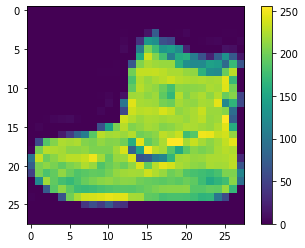

In [4]:
# Print the iamges
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

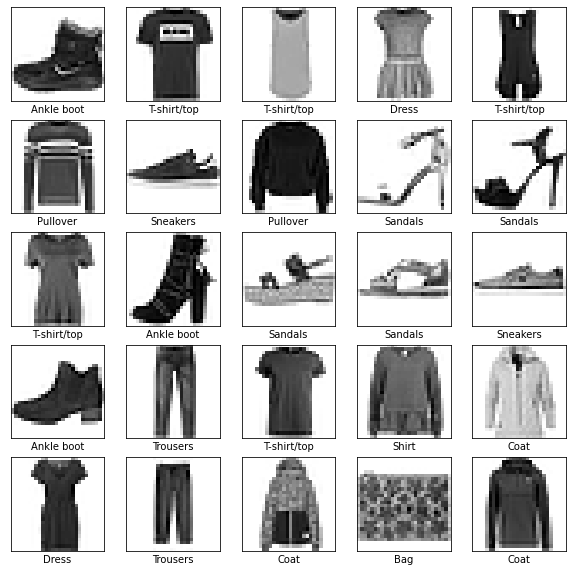

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
#One hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)    
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [7]:
#Two hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)    
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [8]:
#three hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)    
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [ ]:
#Four Hidden Layer with dropout 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation ='sigmoid')    
])
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=35)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/35
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0593 - accuracy: 0.1106
Epoch 2/35
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9388 - accuracy: 0.1129
Epoch 3/35
1875/1875 [==============================] - 14s 8ms/step - loss: 0.8662 - accuracy: 0.1285
Epoch 4/35
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7841 - accuracy: 0.1340
Epoch 5/35
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7172 - accuracy: 0.1280
Epoch 6/35
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6588 - accuracy: 0.1104
Epoch 7/35
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6066 - accuracy: 0.0755
Epoch 8/35
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5656 - accuracy: 0.0770
Epoch 9/35
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5471 - accuracy: 0.0854
Epoch 10/35
1875/1875 [==============================] - 14s 8ms/step - l